In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


In [2]:

data = pd.read_csv("/content/Wine_clust .csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**EDA**

In [3]:
data.shape

(178, 13)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.iloc[:, 1:13]

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
features = data.iloc[:, 1:13].values
features.shape

(178, 12)

In [9]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [10]:
from sklearn.preprocessing import normalize


# Normalizing the data so that the data approximately
# follows a Gaussian distribution

X_normalized = normalize(features_scaled)

# Converting the numpy array into a pandas DataFrame

data_normalized = pd.DataFrame(X_normalized)

**KMEANS**

In [11]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_normalized)
    wcss.append(kmeans.inertia_)

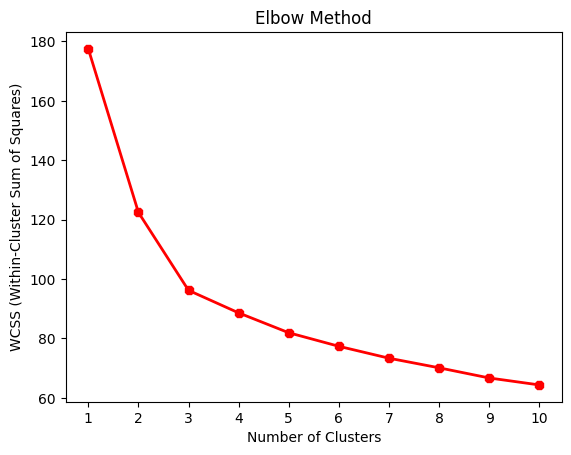

In [12]:
# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker ="8")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(np.arange(1,11,1))
plt.show()

In [13]:
wcss

[177.49017357844173,
 122.44526149621556,
 96.2058748622518,
 88.6221473008496,
 81.93600086061008,
 77.36722536050762,
 73.3594873325314,
 70.12825086857616,
 66.70662237552439,
 64.36206838525338]

In [14]:
# Based on the Elbow Method, let's choose the number of clusters as 3
num_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(data_normalized)

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [15]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2,
       1, 1, 0, 2, 0, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [16]:
kmeans.cluster_centers_

array([[ 0.19753283,  0.04758937,  0.11471928, -0.00217396, -0.26160061,
        -0.31192479,  0.19347185, -0.22815304,  0.1717998 , -0.25833851,
        -0.32112845, -0.10586003],
       [-0.14343339, -0.18522958,  0.09992029, -0.26716713, -0.04550676,
         0.01295162, -0.00275236, -0.01041385, -0.31562632,  0.16207795,
         0.13166929, -0.30414488],
       [-0.10585479,  0.08568328, -0.18898678,  0.15016539,  0.26255448,
         0.28594653, -0.19084723,  0.18347891,  0.00968844,  0.13982119,
         0.23732785,  0.31060598]])

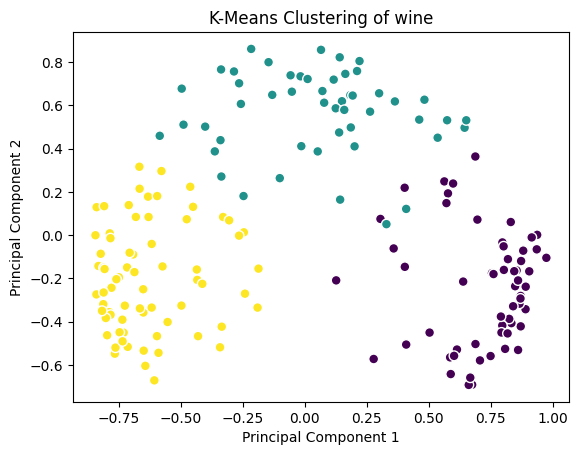

In [17]:
# Visualize the clusters using PCA
pca = PCA(n_components=3)
features_pca = pca.fit_transform(data_normalized)

plt.scatter(features_pca[:, 0], features_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolors='w', s=50)
plt.title('K-Means Clustering of wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

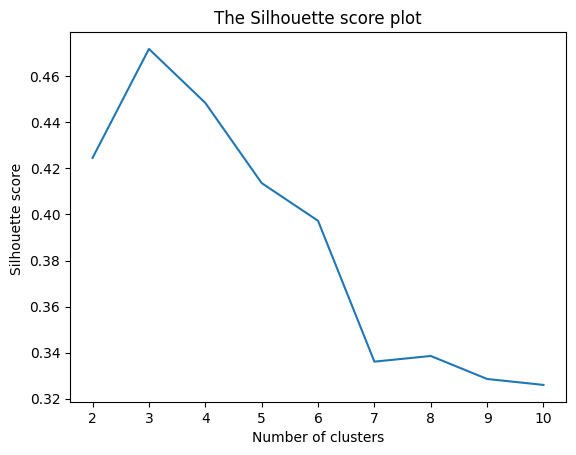

In [18]:
score=[]
for i in range(2,11):
  km=KMeans(i)
  km.fit_predict(features_pca)
  score.append(silhouette_score(features_pca, km.labels_, metric='euclidean'))
number_clusters = range(2,11)
plt.plot(number_clusters,score)
plt.title('The Silhouette score plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score ')
plt.show()

**Agglomertive clustering**

In [19]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Cluster               178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


Agglomerative

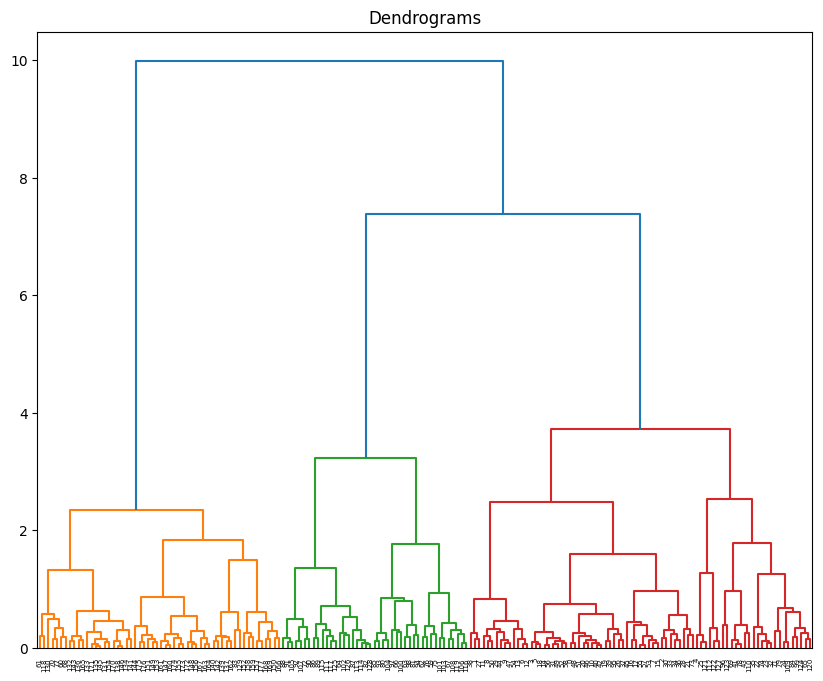

In [21]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 8))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(features_pca, method='ward'))

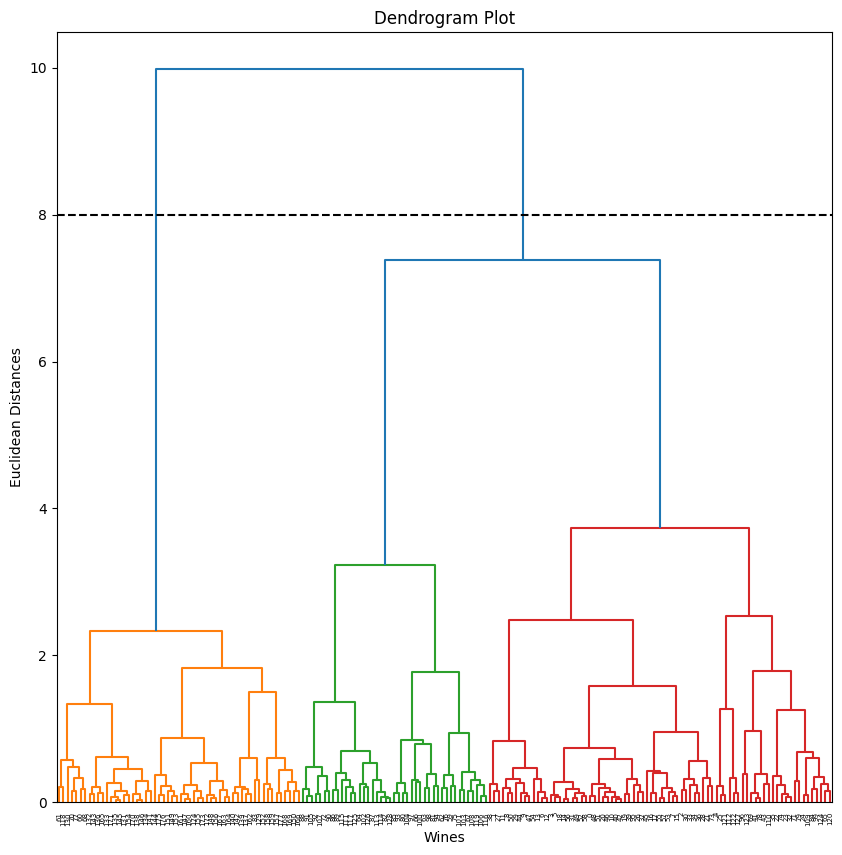

In [23]:



#Finding the optimal number of clusters using the dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
dendro = shc.dendrogram(shc.linkage(features_pca, method="ward"))
plt.axhline(y=8,color="black",linestyle="--")
plt.title("Dendrogram Plot")
plt.ylabel("Euclidean Distances")
plt.xlabel("Wines")
plt.show()


In [24]:
from sklearn.cluster import AgglomerativeClustering
aggcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
aggcluster.fit(features_pca)
aggcluster.fit_predict(features_pca)    #aggcluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0,
       2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [25]:
aggcluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0,
       2, 2, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

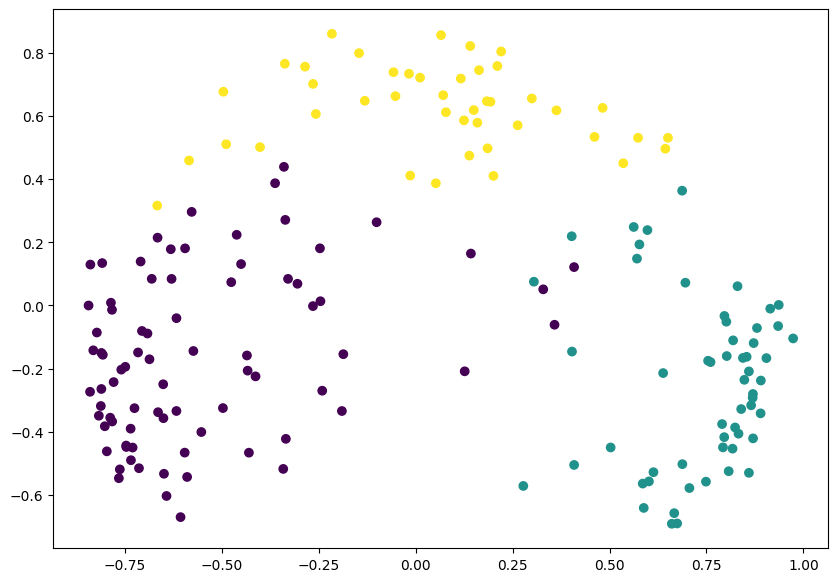

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(features_pca[:,0], features_pca[:,1], c=aggcluster.labels_)

**The data has been clustered into 3 clusters labelled as 0,1,2 using Agglomerative Hierarchical clustering algorithm**

# **3.Wine clustering using DBSCAN**

Model Training

In [27]:
#baseline model
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
y = dbscan.fit_predict(features_scaled)

In [28]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Here clustering is very bad, every observation is treated as outlier

In [29]:
dbscan.get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

Hyperparameter tuning

In [30]:
from sklearn.model_selection import GridSearchCV

params = {'eps': [1, 2, 3, 4, 5], 'min_samples': [3, 5, 7, 10, 15]}

gcv = GridSearchCV(estimator=dbscan, param_grid=params, cv=10, scoring='adjusted_mutual_info_score', n_jobs=-1)

In [31]:
gcv.fit(features_scaled)

GridSearchCV(cv=10, estimator=DBSCAN(), n_jobs=-1,
             param_grid={'eps': [1, 2, 3, 4, 5],
                         'min_samples': [3, 5, 7, 10, 15]},
             scoring='adjusted_mutual_info_score')

In [32]:
gcv.best_params_

{'eps': 1, 'min_samples': 3}

In [33]:
dbscan = DBSCAN(eps=2, min_samples=3)
y = dbscan.fit_predict(features_scaled)
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0, -1,  0,
       -1, -1, -1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1])

In [34]:
from sklearn.metrics import silhouette_score

print('Silhouette score - ', silhouette_score(features_scaled, y, metric='euclidean'))


Silhouette score -  0.1719552350196828


In [35]:
data['cluster'] = y

In [ ]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1
